# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
lats = []
longs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []
w_cities = []

url = "http://api.openweathermap.org/data/2.5/weather?"
i = 0

for city in cities[0:505]:
    try:
        i = i+1
        print(f"Processing Record {i} | {city}")
        query_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        w_cities.append(weather_json["name"])
        temperature = weather_json["main"]["temp"]
        print(f"The temperature in {city} is {temperature} F.")
        lats.append(weather_json["coord"]["lat"])
        longs.append(weather_json["coord"]["lon"])
        max_temps.append(weather_json["main"]["temp_max"])
        humidities.append(weather_json["main"]["humidity"])
        cloudinesses.append(weather_json["clouds"]["all"])
        wind_speeds.append(weather_json["wind"]["speed"])
        countries.append(weather_json["sys"]["country"])
        dates.append(weather_json["dt"])
    except:
        print("City not found, skipping...")

Processing Record 1 | punta arenas
The temperature in punta arenas is 59 F.
Processing Record 2 | taolanaro
City not found, skipping...
Processing Record 3 | samusu
City not found, skipping...
Processing Record 4 | hami
The temperature in hami is 34.59 F.
Processing Record 5 | neuquen
The temperature in neuquen is 75.2 F.
Processing Record 6 | doha
The temperature in doha is 71.74 F.
Processing Record 7 | upernavik
The temperature in upernavik is 11.86 F.
Processing Record 8 | adrar
The temperature in adrar is 80.17 F.
Processing Record 9 | hilo
The temperature in hilo is 62.42 F.
Processing Record 10 | new norfolk
The temperature in new norfolk is 49.39 F.
Processing Record 11 | saskylakh
The temperature in saskylakh is -24.92 F.
Processing Record 12 | gidam
The temperature in gidam is 64.31 F.
Processing Record 13 | kapaa
The temperature in kapaa is 65.52 F.
Processing Record 14 | agadez
The temperature in agadez is 85.59 F.
Processing Record 15 | yellowknife
The temperature in yello

The temperature in buala is 78.76 F.
Processing Record 117 | longyearbyen
The temperature in longyearbyen is 12.2 F.
Processing Record 118 | kahului
The temperature in kahului is 63.95 F.
Processing Record 119 | severo-kurilsk
The temperature in severo-kurilsk is 25.56 F.
Processing Record 120 | lakatoro
The temperature in lakatoro is 79.03 F.
Processing Record 121 | warqla
City not found, skipping...
Processing Record 122 | verkhnya syrovatka
The temperature in verkhnya syrovatka is 26.04 F.
Processing Record 123 | faya
The temperature in faya is 59.9 F.
Processing Record 124 | somerset
The temperature in somerset is 28.51 F.
Processing Record 125 | ndele
The temperature in ndele is 94.48 F.
Processing Record 126 | hermanus
The temperature in hermanus is 79 F.
Processing Record 127 | lengshuitan
The temperature in lengshuitan is 48.74 F.
Processing Record 128 | raudeberg
The temperature in raudeberg is 15.62 F.
Processing Record 129 | lagoa
The temperature in lagoa is 61.07 F.
Process

The temperature in lesogorsk is 15.03 F.
Processing Record 233 | nacimiento
The temperature in nacimiento is 75.2 F.
Processing Record 234 | san quintin
The temperature in san quintin is 53.73 F.
Processing Record 235 | port hedland
The temperature in port hedland is 80.6 F.
Processing Record 236 | kaeo
The temperature in kaeo is 70 F.
Processing Record 237 | safford
The temperature in safford is 41.31 F.
Processing Record 238 | banda aceh
The temperature in banda aceh is 80.22 F.
Processing Record 239 | arzamas
The temperature in arzamas is 2.88 F.
Processing Record 240 | bosaso
The temperature in bosaso is 78.8 F.
Processing Record 241 | xichang
The temperature in xichang is 45.9 F.
Processing Record 242 | cumaribo
City not found, skipping...
Processing Record 243 | payakumbuh
The temperature in payakumbuh is 72.12 F.
Processing Record 244 | la paz
The temperature in la paz is 53.6 F.
Processing Record 245 | victoria
The temperature in victoria is 63 F.
Processing Record 246 | virgin

The temperature in naryan-mar is -10.59 F.
Processing Record 347 | dudinka
The temperature in dudinka is -11.72 F.
Processing Record 348 | komsomolets
The temperature in komsomolets is -10.5 F.
Processing Record 349 | yar-sale
The temperature in yar-sale is -26.14 F.
Processing Record 350 | igarka
The temperature in igarka is -1.43 F.
Processing Record 351 | iqaluit
The temperature in iqaluit is 12.09 F.
Processing Record 352 | bambous virieux
The temperature in bambous virieux is 79.84 F.
Processing Record 353 | pacific grove
The temperature in pacific grove is 49.35 F.
Processing Record 354 | pirovskoye
The temperature in pirovskoye is 1.22 F.
Processing Record 355 | sirjan
The temperature in sirjan is 55.94 F.
Processing Record 356 | sao filipe
The temperature in sao filipe is 72.32 F.
Processing Record 357 | sassandra
The temperature in sassandra is 84.42 F.
Processing Record 358 | rabak
The temperature in rabak is 91.71 F.
Processing Record 359 | jumla
The temperature in jumla is 

The temperature in suzhou is 44.55 F.
Processing Record 461 | alexandria
The temperature in alexandria is 71.6 F.
Processing Record 462 | zacatepec
The temperature in zacatepec is 60.8 F.
Processing Record 463 | ranong
The temperature in ranong is 76.95 F.
Processing Record 464 | ulverstone
The temperature in ulverstone is 57 F.
Processing Record 465 | kamenskoye
City not found, skipping...
Processing Record 466 | santa marinella
The temperature in santa marinella is 51.01 F.
Processing Record 467 | broome
The temperature in broome is 22.01 F.
Processing Record 468 | mirpur khas
The temperature in mirpur khas is 73.54 F.
Processing Record 469 | raglan
The temperature in raglan is 66.99 F.
Processing Record 470 | severnoye
The temperature in severnoye is -7.4 F.
Processing Record 471 | pecos
The temperature in pecos is 41 F.
Processing Record 472 | oranjemund
The temperature in oranjemund is 70.14 F.
Processing Record 473 | avera
The temperature in avera is 49.41 F.
Processing Record 47

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Verify uniform array lengths to enable dictionary creation below.
#len(w_cities)
#len(lats)
#len(longs)
#len(max_temps)
#len(humidities)
#len(cloudinesses)
#len(wind_speeds)
#len(countries)
len(dates)


465

In [34]:
# Create dictionary of weather data for cities
weather_dict = {"City": w_cities, "Lat": lats, "Lng": longs, "Max Temp": max_temps, "Humidity": humidities, "Cloudiness": cloudinesses, "Wind Speed": wind_speeds, "Country": countries, "Date": dates}
# Create dataframe of weather dictionary
weather_data = pd.DataFrame(weather_dict)
# Export dataframe to CSV
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=True)
# Show dataframe
weather_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,59.00,72,0,6.91,CL,1612881975
1,Kumul,42.8000,93.4500,34.59,76,100,3.00,CN,1612881975
2,Neuquén,-38.9516,-68.0591,75.20,43,0,9.22,AR,1612881765
3,Doha,25.2867,51.5333,73.40,56,0,9.22,QA,1612881862
4,Upernavik,72.7868,-56.1549,11.86,77,2,3.18,GL,1612881975
...,...,...,...,...,...,...,...,...,...
460,Chernolesskoye,44.7156,43.7133,36.00,97,99,4.00,RU,1612882028
461,Salinópolis,-0.6136,-47.3561,82.56,81,100,10.67,BR,1612882028
462,Itarema,-2.9248,-39.9167,85.75,62,99,9.95,BR,1612882028
463,Inuvik,68.3499,-133.7218,-40.00,74,37,3.44,CA,1612882028


In [35]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,465.000000,465.000000,465.000000,465.000000,465.00000,465.000000,4.650000e+02
mean,22.113015,12.047992,49.288882,71.509677,52.28172,8.581398,1.612882e+09
std,32.837671,90.500624,33.905191,20.829263,40.23573,6.205612,7.511216e+01
min,-54.800000,-179.166700,-45.400000,8.000000,0.00000,0.130000,1.612881e+09
25%,-3.736100,-68.150000,26.600000,63.000000,5.00000,4.180000,1.612882e+09
50%,27.804300,19.303800,60.870000,76.000000,56.00000,7.340000,1.612882e+09
75%,49.750000,88.166700,78.010000,87.000000,90.00000,11.270000,1.612882e+09
max,78.218600,179.316700,99.430000,100.000000,100.00000,42.260000,1.612882e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
weather_data.loc[weather_data["Humidity"] > 100, :]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [16]:
#  Get the indices of cities that have humidity over 100%.



,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [39]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_data = weather_data.drop(weather_data[weather_data['Humidity'] > 100].index, inplace = False)
clean_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,59.00,72,0,6.91,CL,1612881975
1,Kumul,42.8000,93.4500,34.59,76,100,3.00,CN,1612881975
2,Neuquén,-38.9516,-68.0591,75.20,43,0,9.22,AR,1612881765
3,Doha,25.2867,51.5333,73.40,56,0,9.22,QA,1612881862
4,Upernavik,72.7868,-56.1549,11.86,77,2,3.18,GL,1612881975
...,...,...,...,...,...,...,...,...,...
460,Chernolesskoye,44.7156,43.7133,36.00,97,99,4.00,RU,1612882028
461,Salinópolis,-0.6136,-47.3561,82.56,81,100,10.67,BR,1612882028
462,Itarema,-2.9248,-39.9167,85.75,62,99,9.95,BR,1612882028
463,Inuvik,68.3499,-133.7218,-40.00,74,37,3.44,CA,1612882028


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

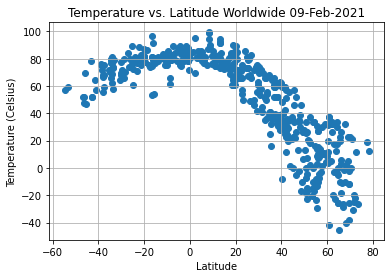

In [41]:
plt.scatter(clean_weather_data["Lat"], clean_weather_data["Max Temp"], marker="o")
plt.title("Temperature vs. Latitude Worldwide 09-Feb-2021")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatVStempWorld.png")

## Latitude vs. Humidity Plot

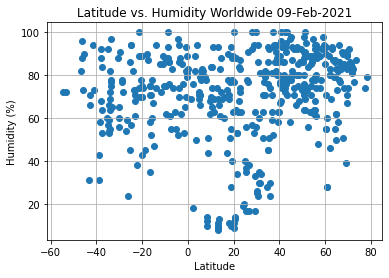

In [42]:
plt.scatter(clean_weather_data["Lat"], clean_weather_data["Humidity"], marker="o")
plt.title("Latitude vs. Humidity Worldwide 09-Feb-2021")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatVShumWorld.png")

## Latitude vs. Cloudiness Plot

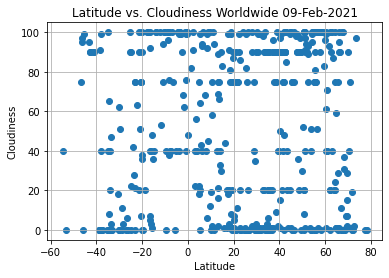

In [73]:
plt.scatter(clean_weather_data["Lat"], clean_weather_data["Cloudiness"], marker="o")
plt.title("Latitude vs. Cloudiness Worldwide 09-Feb-2021")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatVScloudWorld.png")

## Latitude vs. Wind Speed Plot

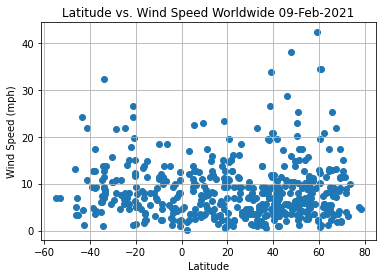

In [48]:
plt.scatter(clean_weather_data["Lat"], clean_weather_data["Wind Speed"], marker="o")
plt.title("Latitude vs. Wind Speed Worldwide 09-Feb-2021")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatVSwindWorld.png")

## Linear Regression

In [47]:
weather_NH = clean_weather_data.drop(clean_weather_data[clean_weather_data['Lat'] < 0].index, inplace = False)
weather_SH = clean_weather_data.drop(clean_weather_data[clean_weather_data['Lat'] > 0].index, inplace = False)
# weather_NH
weather_SH

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,59.00,72,0,6.91,CL,1612881975
2,Neuquén,-38.9516,-68.0591,75.20,43,0,9.22,AR,1612881765
7,New Norfolk,-42.7826,147.0587,52.00,66,90,1.10,AU,1612881975
19,Cape Town,-33.9258,18.4232,81.00,64,20,32.21,ZA,1612881743
21,Mahébourg,-20.4081,57.7000,78.80,89,75,12.15,MU,1612881976
...,...,...,...,...,...,...,...,...,...
452,Biak,-0.9131,122.8766,78.51,82,76,1.99,ID,1612882027
454,San Rafael,-34.6177,-68.3301,66.25,59,65,7.36,AR,1612882027
459,Karratha,-20.7377,116.8463,83.01,70,51,19.64,AU,1612882028
461,Salinópolis,-0.6136,-47.3561,82.56,81,100,10.67,BR,1612882028


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7653837630513379


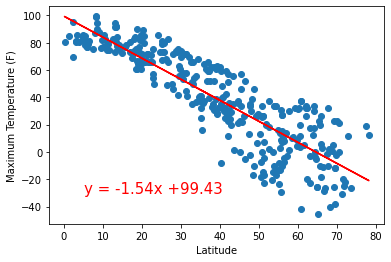

In [51]:
x_values = weather_NH["Lat"]
y_values = weather_NH["Max Temp"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVStempNH-LR.png")
# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3718497031154878


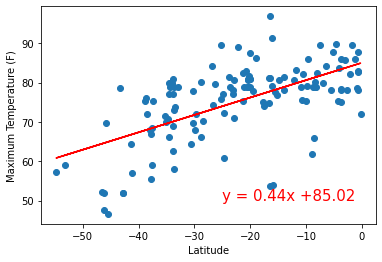

In [56]:
x_values = weather_SH["Lat"]
y_values = weather_SH["Max Temp"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVStempSH-LR.png")
# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11111716680031215


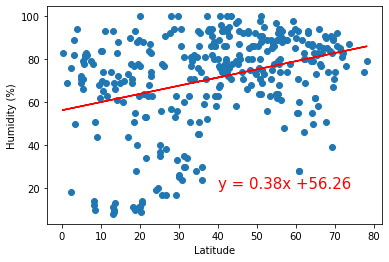

In [70]:
x_values = weather_NH["Lat"]
y_values = weather_NH["Humidity"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVShumNH-LR.png")
# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01975123532458017


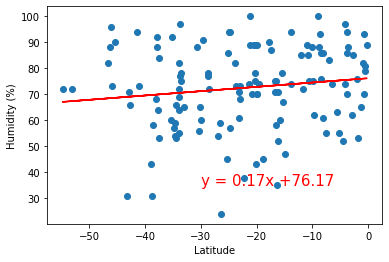

In [69]:
x_values = weather_SH["Lat"]
y_values = weather_SH["Humidity"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVShumSH-LR.png")
# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0004147536762758912


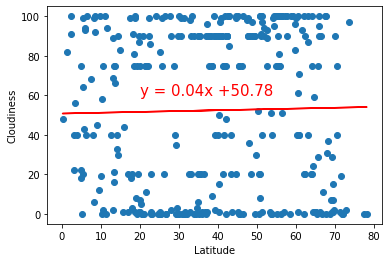

In [64]:
x_values = weather_NH["Lat"]
y_values = weather_NH["Cloudiness"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVScloudNH-LR.png")
# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12796738969816251


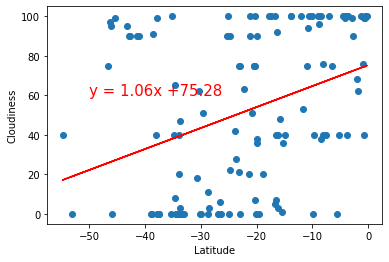

In [68]:
x_values = weather_SH["Lat"]
y_values = weather_SH["Cloudiness"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVScloudSH-LR.png")
# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005773145566725667


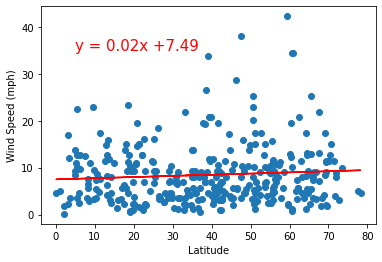

In [63]:
x_values = weather_NH["Lat"]
y_values = weather_NH["Wind Speed"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVStempNH-LR.png")
# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.020826024468780752


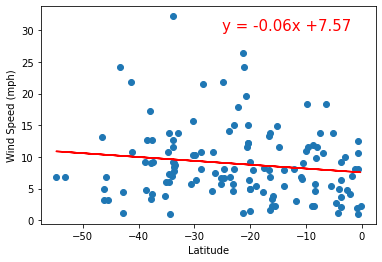

In [72]:
x_values = weather_SH["Lat"]
y_values = weather_SH["Wind Speed"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVStempSH-LR.png")
# Show plot
plt.show()